In [2]:
import geopandas as gpd
import pandas as pd
import sqlite3
import os

# Importando os bancos de dados

In [3]:
conn = sqlite3.connect(os.path.join('pib.db'))
query= "SELECT * FROM pib"
pib = pd.read_sql(query,conn)

In [5]:
conn = sqlite3.connect(os.path.join('racial.db'))
query= "SELECT * FROM racial"
racial = pd.read_sql(query,conn)

### Transformando os DataFrames para o tipo GeoDataFrame

In [7]:
pib['geometry']=gpd.GeoSeries.from_wkt(pib['geometry'])
pib = gpd.GeoDataFrame(pib, geometry='geometry')

In [11]:
racial['geometry']=gpd.GeoSeries.from_wkt(racial['geometry'])
racial = gpd.GeoDataFrame(racial, geometry='geometry')

## Tratando os dados

In [21]:
pib = pib.sort_values('nome')
pib['nome'] = pib['nome'].str.title()
pib.head(2)

,index,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,legenda,geometry
3330,3330,vw_pib_percapita.fid-2e5b397f_17cf1b12db8_-32f2,1076,GOIÁS,Abadia De Goiás,2010,38975.133,6301.0,6185.55,- 9639.65,"MULTIPOLYGON (((-49.44332 -16.72349, -49.44079..."
3492,3492,vw_pib_percapita.fid-2e5b397f_17cf1b12db8_-3250,2687,MINAS GERAIS,Abadia Dos Dourados,2010,71222.170,6805.0,10466.15,9639.65 - 22144.80,"MULTIPOLYGON (((-47.42611 -18.16380, -47.42276..."


In [20]:
racial = racial.sort_values('nome')
racial['nome'] = racial['nome'].str.title()
racial.head(2)

,index,id,gid,UF,nome,Censo,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas,descricao,legenda,geometry
3330,3330,vw_per_pessoas_pretas.fid-60efe8e1_17d582643c1...,1076,GOIÁS,Abadia De Goiás,2010,6876.0,405,5.890052,Percentual de pessoas residentes de cor ou raç...,"4,22% - 7,79%","MULTIPOLYGON (((-49.44332 -16.72349, -49.44079..."
3492,3492,vw_per_pessoas_pretas.fid-60efe8e1_17d5828ea1d...,2687,MINAS GERAIS,Abadia Dos Dourados,2010,6704.0,292,4.355608,Percentual de pessoas residentes de cor ou raç...,"4,22% - 7,79%","MULTIPOLYGON (((-47.42611 -18.16380, -47.42276..."


### Unindo os Dataframes sobre o PIB e a população negra

In [23]:
racial = racial.drop(racial.columns[[1,2,3,7]], axis=1) #retirando colunas iguais
merge = pd.merge(pib, racial, how='outer', on='gid')
merge.head()

KeyError: 'gid'

## Analisando os dados

In [13]:
merge['PIB_percapita'] = merge['PIB_percapita'].astype(float)
merge['Pop_est_2009'] = merge['Pop_est_2009'].astype(float)
merge['PER_Pessoas_Pretas'] = merge['PER_Pessoas_Pretas'].astype(float)

In [14]:
merge[['PIB', 'Pop_est_2009', 'PIB_percapita', 'PER_Pessoas_Pretas']].agg(['mean', 'median'])

,PIB,Pop_est_2009,PIB_percapita,PER_Pessoas_Pretas
mean,582020.311889,34405.572763,10977.027145,6.410117
median,80591.720000,11203.000000,8393.170000,5.175179


## Plotando os dados

<AxesSubplot:>

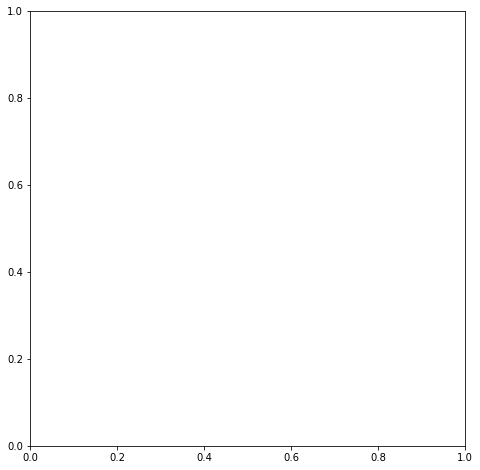

In [15]:
merge.plot(color='green', edgecolor='None', figsize=(15,8))